# Домашнее задание к уроку 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('data/positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('data/negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

C:\Users\leva_\AppData\Local\Temp\ipykernel_9348\4008788770.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = positive.append(negative)


In [3]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from nltk import ngrams
import nltk
from nltk import collocations 
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('genesis')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leva_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\leva_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\genesis.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leva_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from string import punctuation
noise = stopwords.words('russian') + list(punctuation)

In [8]:
from collections import Counter

In [9]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:30]

2870536


['first_timee',
 'хоть',
 'я',
 'и',
 'школота',
 'но',
 'поверь',
 'у',
 'нас',
 'то',
 'же',
 'самое',
 'D',
 'общество',
 'профилирующий',
 'предмет',
 'типа',
 'Да',
 'все-таки',
 'он',
 'немного',
 'похож',
 'на',
 'него',
 'Но',
 'мой',
 'мальчик',
 'все',
 'равно',
 'лучше']

In [10]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:30]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860),
 ('...', 22363),
 ('меня', 20656),
 ('у', 18928),
 ('как', 18280),
 ('так', 16839),
 ('D', 16575),
 ('это', 16542),
 ('мне', 16337),
 ('все', 14763),
 ('ты', 13412),
 ('но', 12949),
 ("''", 12470),
 ('Я', 12315),
 ('``', 11468),
 ('то', 11433),
 ('..', 11392),
 ('по', 11294),
 ('уже', 10180),
 ('за', 10038),
 ('же', 9628)]

-----

## Задание 1.

**Задание**: обучите три классификатора: 

1) на токенах с высокой частотой 

2) на токенах со средней частотой 

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

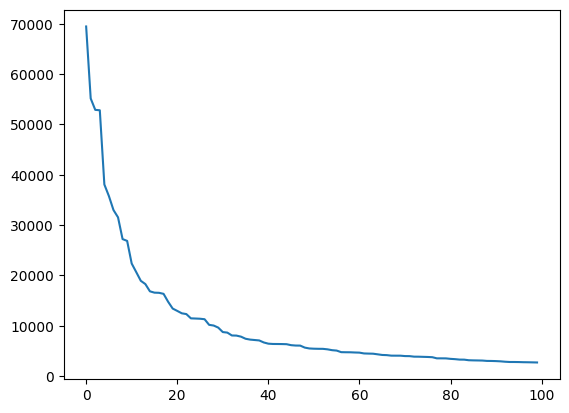

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

first_part_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_part_freqs)
plt.show()

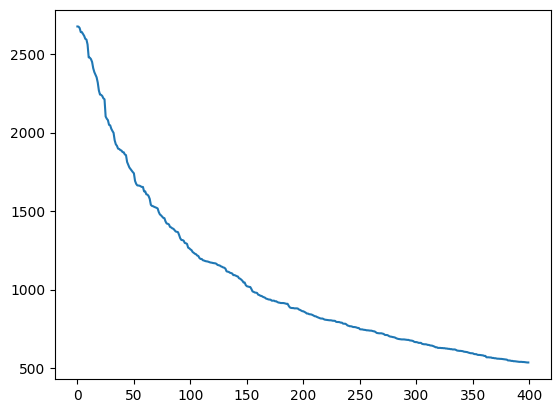

In [12]:
first_part_freqs = [freq for word, freq in freq_dict_sorted[100:500]]
plt.plot(first_part_freqs)
plt.show()

In [13]:
# Подготовим три группы токенов: с высокой, средней и низкой частотой

high_tokens = set()
med_tokens = set()
lit_tokens = set()
h = 17000 # если частота выше этого значения будем считать что это токен с высокой частотой. Выбор согласно графиков на предыдущих шагах.
m = 1000 # если частота ниже этого значения будем считать что это токен с низкой частотой. Выбор согласно графиков на предыдущих шагах.
for i in freq_dict_sorted:
    if i[1] > h:
        high_tokens.add(i[0])
    elif i[1] < m:
        lit_tokens.add(i[0])
    else:
        med_tokens.add(i[0])
print(len(high_tokens),len(med_tokens),len(lit_tokens))                     
                       

14 241 350846


In [14]:
# создадим фильтр (стопслова) с добавлением токенов средней и низкой частоты, 
# то есть будем считать только по токенам с высокой частотой
sw = noise + list(lit_tokens) + list(med_tokens)

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.87      0.56      0.68     43043
    positive       0.35      0.73      0.47     13666

    accuracy                           0.60     56709
   macro avg       0.61      0.65      0.58     56709
weighted avg       0.74      0.60      0.63     56709

CPU times: total: 56.5 s
Wall time: 56.6 s


In [17]:
# посчитаем только по токенам с средней частотой
sw = noise + list(high_tokens) + list(lit_tokens)

In [18]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.49      0.67      0.56     20361
    positive       0.76      0.61      0.68     36348

    accuracy                           0.63     56709
   macro avg       0.63      0.64      0.62     56709
weighted avg       0.66      0.63      0.64     56709

CPU times: total: 56.5 s
Wall time: 56.7 s


In [19]:
# посчитаем только по токенам с низкой частотой
sw = noise + list(high_tokens) + list(med_tokens)

In [20]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.79      0.74      0.77     29996
    positive       0.73      0.78      0.76     26713

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709

CPU times: total: 40.2 s
Wall time: 40.2 s


### Вывод:

Лучшая точность получилась на токенах с низкой частотностью, конечно есть зависимость от того как смещать границы разделения частотности.


## Задание 2.

найти фичи с наибольшей значимостью, и вывести их

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Оставим знаки пунктуации  
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=stopwords.words('russian'))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27890
    positive       1.00      1.00      1.00     28819

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



In [23]:
# похоже что существенный вклад дают симолы которые участвуют в смайлах. Проверим
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
p = list('"#$%&\'+,.<=>?@[\\]^`{|}~')
p

['"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '+',
 ',',
 '.',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '`',
 '{',
 '|',
 '}',
 '~']

In [25]:
myfilter = stopwords.words('russian') + p
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words= myfilter)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27854
    positive       1.00      1.00      1.00     28855

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



Гипотеза подтверждается

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [26]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.85      0.92     32839
    positive       0.83      1.00      0.91     23870

    accuracy                           0.91     56709
   macro avg       0.91      0.93      0.91     56709
weighted avg       0.93      0.91      0.91     56709



In [27]:
pp = []
for i in punctuation:
    cool_token = i
    pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
    pp.append((i,accuracy_score(pred, y_test)))
print(pp)

[('!', 0.5155971715248021), ('"', 0.5061806767885169), ('#', 0.5026009980779065), ('$', 0.4926731206686769), ('%', 0.49487735632791974), ('&', 0.49239097850429386), ("'", 0.4925673173570333), ('(', 0.02542806256502495), (')', 0.9135057927313125), ('*', 0.5122114655522051), ('+', 0.4928318256361424), (',', 0.5071329065933097), ('-', 0.50887866123543), ('.', 0.5107654869597419), ('/', 0.545909820310709), (':', 0.5482551270521434), (';', 0.4958119522474387), ('<', 0.4925849512423072), ('=', 0.49223227353682836), ('>', 0.4925849512423072), ('?', 0.5047170643107796), ('@', 0.5671057504099878), ('[', 0.492655486783403), ('\\', 0.49260258512758115), (']', 0.492655486783403), ('^', 0.4978927507097639), ('_', 0.5169197129203478), ('`', 0.49214410411045867), ('{', 0.4925496834717593), ('|', 0.4882470154649174), ('}', 0.4926202190128551), ('~', 0.4926731206686769)]


Фичи с наибольшей значимостью

In [28]:
for i in sorted(pp, key=lambda x: -x[1])[:10]:
    print(i[0],'  -   ' ,i[1])


)   -    0.9135057927313125
@   -    0.5671057504099878
:   -    0.5482551270521434
/   -    0.545909820310709
_   -    0.5169197129203478
!   -    0.5155971715248021
*   -    0.5122114655522051
.   -    0.5107654869597419
-   -    0.50887866123543
,   -    0.5071329065933097


----



### Задание 3.

1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера 

3) убедиться что для сетки нет переобучения

In [29]:
%%time
myfilter = stopwords.words('russian') + p

count_vect = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words= myfilter)
bow = count_vect.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

    negative       1.00      0.56      0.72     50133
    positive       0.23      1.00      0.37      6576

    accuracy                           0.61     56709
   macro avg       0.61      0.78      0.54     56709
weighted avg       0.91      0.61      0.68     56709

CPU times: total: 40.5 s
Wall time: 40.6 s


In [30]:
%%time
myfilter = stopwords.words('russian')
tf_vect = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words= myfilter)
bow = tf_vect.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(tf_vect.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27890
    positive       1.00      1.00      1.00     28819

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709

CPU times: total: 39.9 s
Wall time: 40 s


In [31]:
from sklearn.feature_extraction.text import HashingVectorizer

In [32]:
vectorizer = HashingVectorizer(n_features=2**4,)
bow = vectorizer.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vectorizer.transform(x_test))
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

    negative       0.51      0.54      0.53     26041
    positive       0.59      0.55      0.57     30668

    accuracy                           0.55     56709
   macro avg       0.55      0.55      0.55     56709
weighted avg       0.55      0.55      0.55     56709



In [33]:
vectorizer = HashingVectorizer(n_features=2**8,)
bow = vectorizer.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vectorizer.transform(x_test))
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

    negative       0.60      0.61      0.61     27344
    positive       0.63      0.62      0.63     29365

    accuracy                           0.62     56709
   macro avg       0.62      0.62      0.62     56709
weighted avg       0.62      0.62      0.62     56709



In [34]:
vectorizer = HashingVectorizer(n_features=2**10,)
bow = vectorizer.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vectorizer.transform(x_test))
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

    negative       0.64      0.65      0.65     27319
    positive       0.67      0.66      0.66     29390

    accuracy                           0.65     56709
   macro avg       0.65      0.65      0.65     56709
weighted avg       0.65      0.65      0.65     56709



In [35]:
vectorizer = HashingVectorizer(n_features=2**12,)
bow = vectorizer.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vectorizer.transform(x_test))
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

    negative       0.68      0.69      0.68     27278
    positive       0.71      0.69      0.70     29431

    accuracy                           0.69     56709
   macro avg       0.69      0.69      0.69     56709
weighted avg       0.69      0.69      0.69     56709

